In [ ]:
import pandas as pd  #librería para manejar bases de datos
import numpy as np  #libreria para realizar álgebra lineal
import seaborn as sns  #librería alterna para manejo de bases de datos
import matplotlib.pyplot as plt  #libería para realizar gráficos
import numpy.random as nrd  #comando que obtiene un número aleatorio entre un intervalo de números dado
import random  #librería de números aleatorios

In [ ]:
from google.colab import drive  #comando que permite accesar a google drive
drive.mount('/content/drive')  #montaje de google drive en el notebook

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Guardamos la base de datos con ayuda de la librería pandas
DF = pd.read_csv('/content/drive/MyDrive/PracticasProfesionales/Analisis_por_tipos_de_cuentas_cc_analisis_completo.csv')

# **Modificaciones**

In [ ]:
#Se eliminan las últimas 6 filas de la base de datos (axis = 0 indica el acceso por filas)
DF.drop(DF.index[-6:],axis = 0, inplace = True)

In [ ]:
#Reemplazamos 'RECHAZADO' y 'APROBADO' por 0 y 1 respectivamente en la columna status_generado
DF = DF.replace({'status_generado': {'RECHAZADO': 0, 'APROBADO': 1}})

In [ ]:
len_original = DF.shape[0] #guardamos la cantidad de filas original (9869)
len_original

9869

In [ ]:
historico = DF.iloc[:,-1]   #Guardamos la columna del histórico de pagos
mask = historico.str[1] == 'V'  #crear una serie booleana donde true indica que el segundo caracter es V
mask = mask.astype(int)   #Se crea un vector de 0's y 1's

In [ ]:
#Actualizamos la columna de histórico de pagos con la columna de 0's y 1's obtenida
DF.iloc[:,-1] = mask

<ipython-input-300-ea8af7127c04>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  DF.iloc[:,-1] = mask


In [ ]:
#Se eliminan las columnas indicadas de la base de datos (axis = 1 indica el acceso por columnas)
DF.drop('creditosIntegranteSubsidiadoParaEvitarMora',axis = 1, inplace = True)
DF.drop('creditosConvenioDeFiniquito',axis = 1, inplace = True)

In [ ]:
DF.shape  #vemos el tamaño de la base de datos actual (filas, columnas)

(9869, 28)

In [ ]:
#Se eliminan filas duplicadas en la base de datos
DF = DF.drop_duplicates()

In [ ]:
DF.shape   #vemos el tamaño de la base de datos actual (filas, columnas)

(9646, 28)

In [ ]:
#Guardamos el nombre de las columnas de las que realizaremos limpieza de datos
cols = ['atrasos', 'emprende_cerrados',  'posiblesCreditosCerrados', 'edad',
        'otrosCreditosParaAnalizar',  'quebrantos',  'consultas', 'cuentas_activas']

In [ ]:
len(cols)  #número de columnas a limpiar

8

In [ ]:
#ciclo para hacer limpieza de datos de las columnas anteriormente seleccionadas
for i in cols:   #se recorren los nombres del vector de columnas
    x1 = DF[i].quantile(0.25)  #se calcula el cuantil 0.25 de la columna i
    x2 = DF[i].quantile(0.75)  #se calcula el cuantil 0.75 de la columna i

    I = x2 - x1   #se calcula la londitud entre los cuantiles calculados

    lower_bound = x1 - 1.5 * I   #Se calcula el limite inferior para la limpieza
    upper_bound = x2 + 1.5 * I   #Se calcula el limite superior para la limpieza

    print(i, ': x1 = ', lower_bound, ',  x2 = ',upper_bound)
    print('   x1: ', len(DF[(DF[i]< lower_bound)]), ',   x2: ', len(DF[(DF[i]> upper_bound)]))

    DF = DF[((DF[i] >= lower_bound) & (DF[i] <= upper_bound))]   #Se eliminan los datos outliers y nos quedamos con los datos útiles

atrasos : x1 =  -1.5 ,  x2 =  2.5
   x1:  0 ,   x2:  831
emprende_cerrados : x1 =  -21.0 ,  x2 =  35.0
   x1:  0 ,   x2:  231
posiblesCreditosCerrados : x1 =  -1.5 ,  x2 =  2.5
   x1:  0 ,   x2:  649
edad : x1 =  0.0 ,  x2 =  80.0
   x1:  0 ,   x2:  9
otrosCreditosParaAnalizar : x1 =  -38.5 ,  x2 =  77.5
   x1:  0 ,   x2:  221
quebrantos : x1 =  -1.5 ,  x2 =  2.5
   x1:  0 ,   x2:  324
consultas : x1 =  -5.5 ,  x2 =  22.5
   x1:  0 ,   x2:  357
cuentas_activas : x1 =  -2.0 ,  x2 =  6.0
   x1:  0 ,   x2:  196


In [ ]:
DF.shape   #vemos el tamaño de la base de datos actual (filas, columnas)

(6828, 28)

In [ ]:
len_final = DF.shape[0]  #guardamos el numero de filas actual
len_original - len_final  #calculamos cúantas filas se eliminaron en total

3041

In [ ]:
1- len_final / len_original  #Calculamos el porcentaje de filas eliminadas

0.30813658932009325

<ipython-input-311-7fd44968563e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DF.corr(), annot=True, fmt=".2f", ax=ax, cmap="cividis")


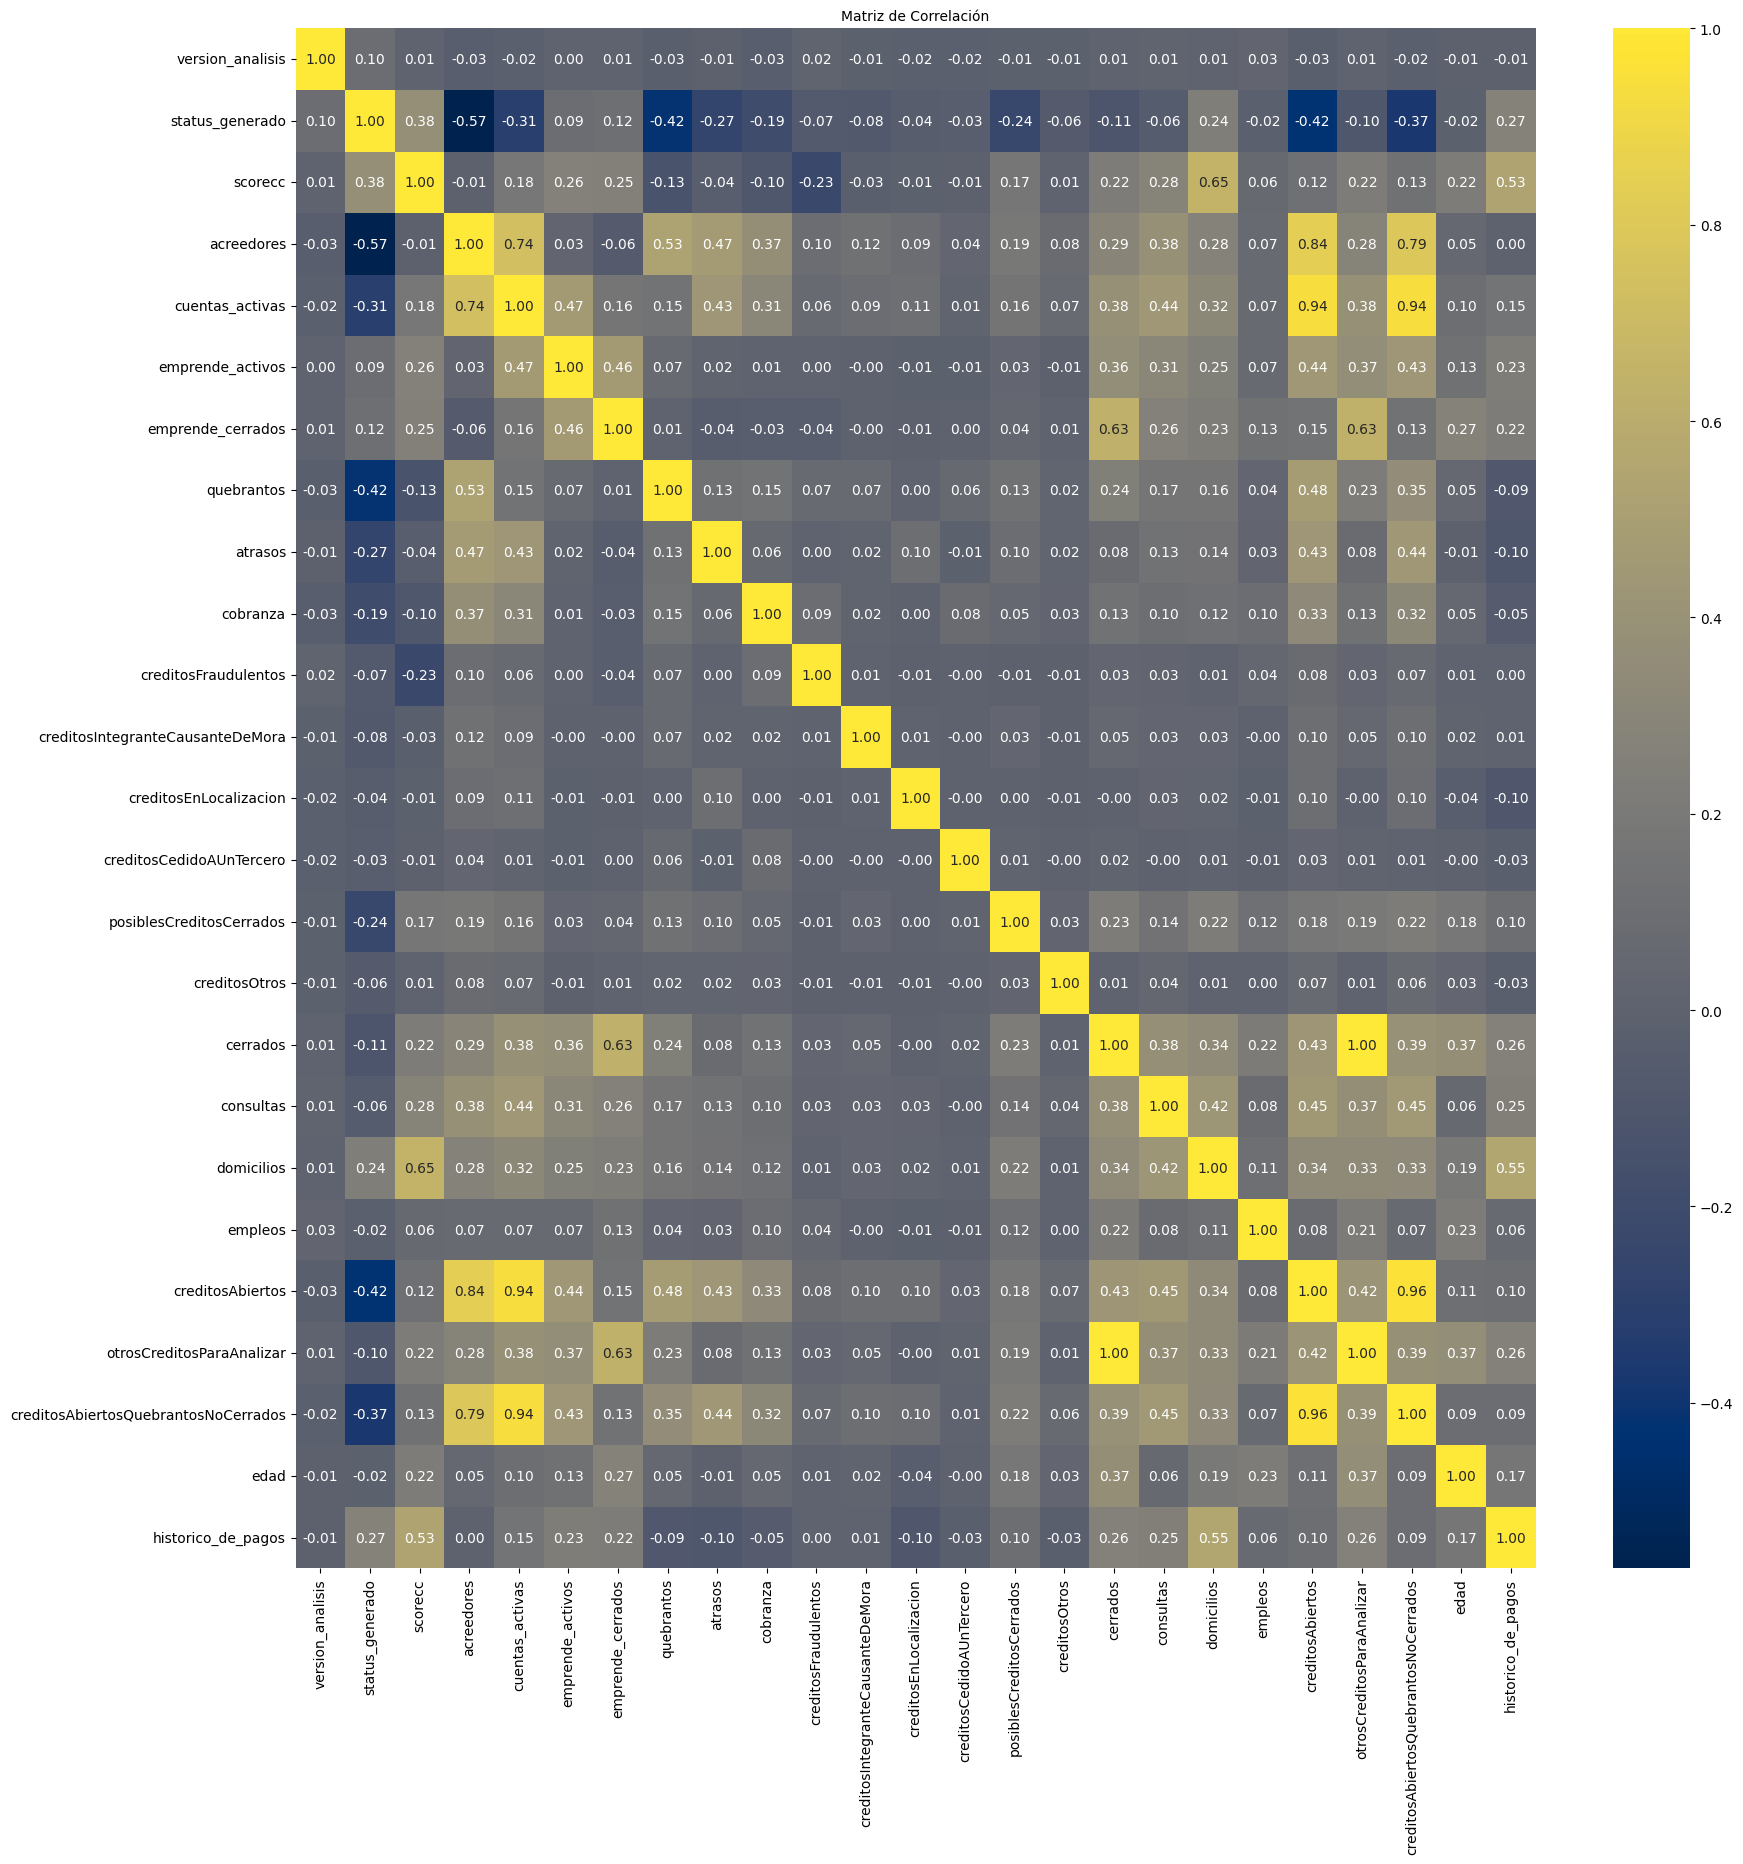

In [ ]:
# Realizamos la matriz de correlación
f, ax = plt.subplots(figsize=[20, 20])
sns.heatmap(DF.corr(), annot=True, fmt=".2f", ax=ax, cmap="cividis")
ax.set_title("Matriz de Correlación", fontsize=10)
plt.show()

In [ ]:
#Eliminamos columnas que no generan gran importancia para el modelo y que fueron escogidas según el análisis hecho
DF.drop('otrosCreditosParaAnalizar',axis = 1, inplace = True)
DF.drop('creditosAbiertosQuebrantosNoCerrados',axis = 1, inplace = True)
DF.drop('domicilios',axis = 1, inplace = True)
DF.drop('creditosAbiertos',axis = 1, inplace = True)

<ipython-input-313-7fd44968563e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DF.corr(), annot=True, fmt=".2f", ax=ax, cmap="cividis")


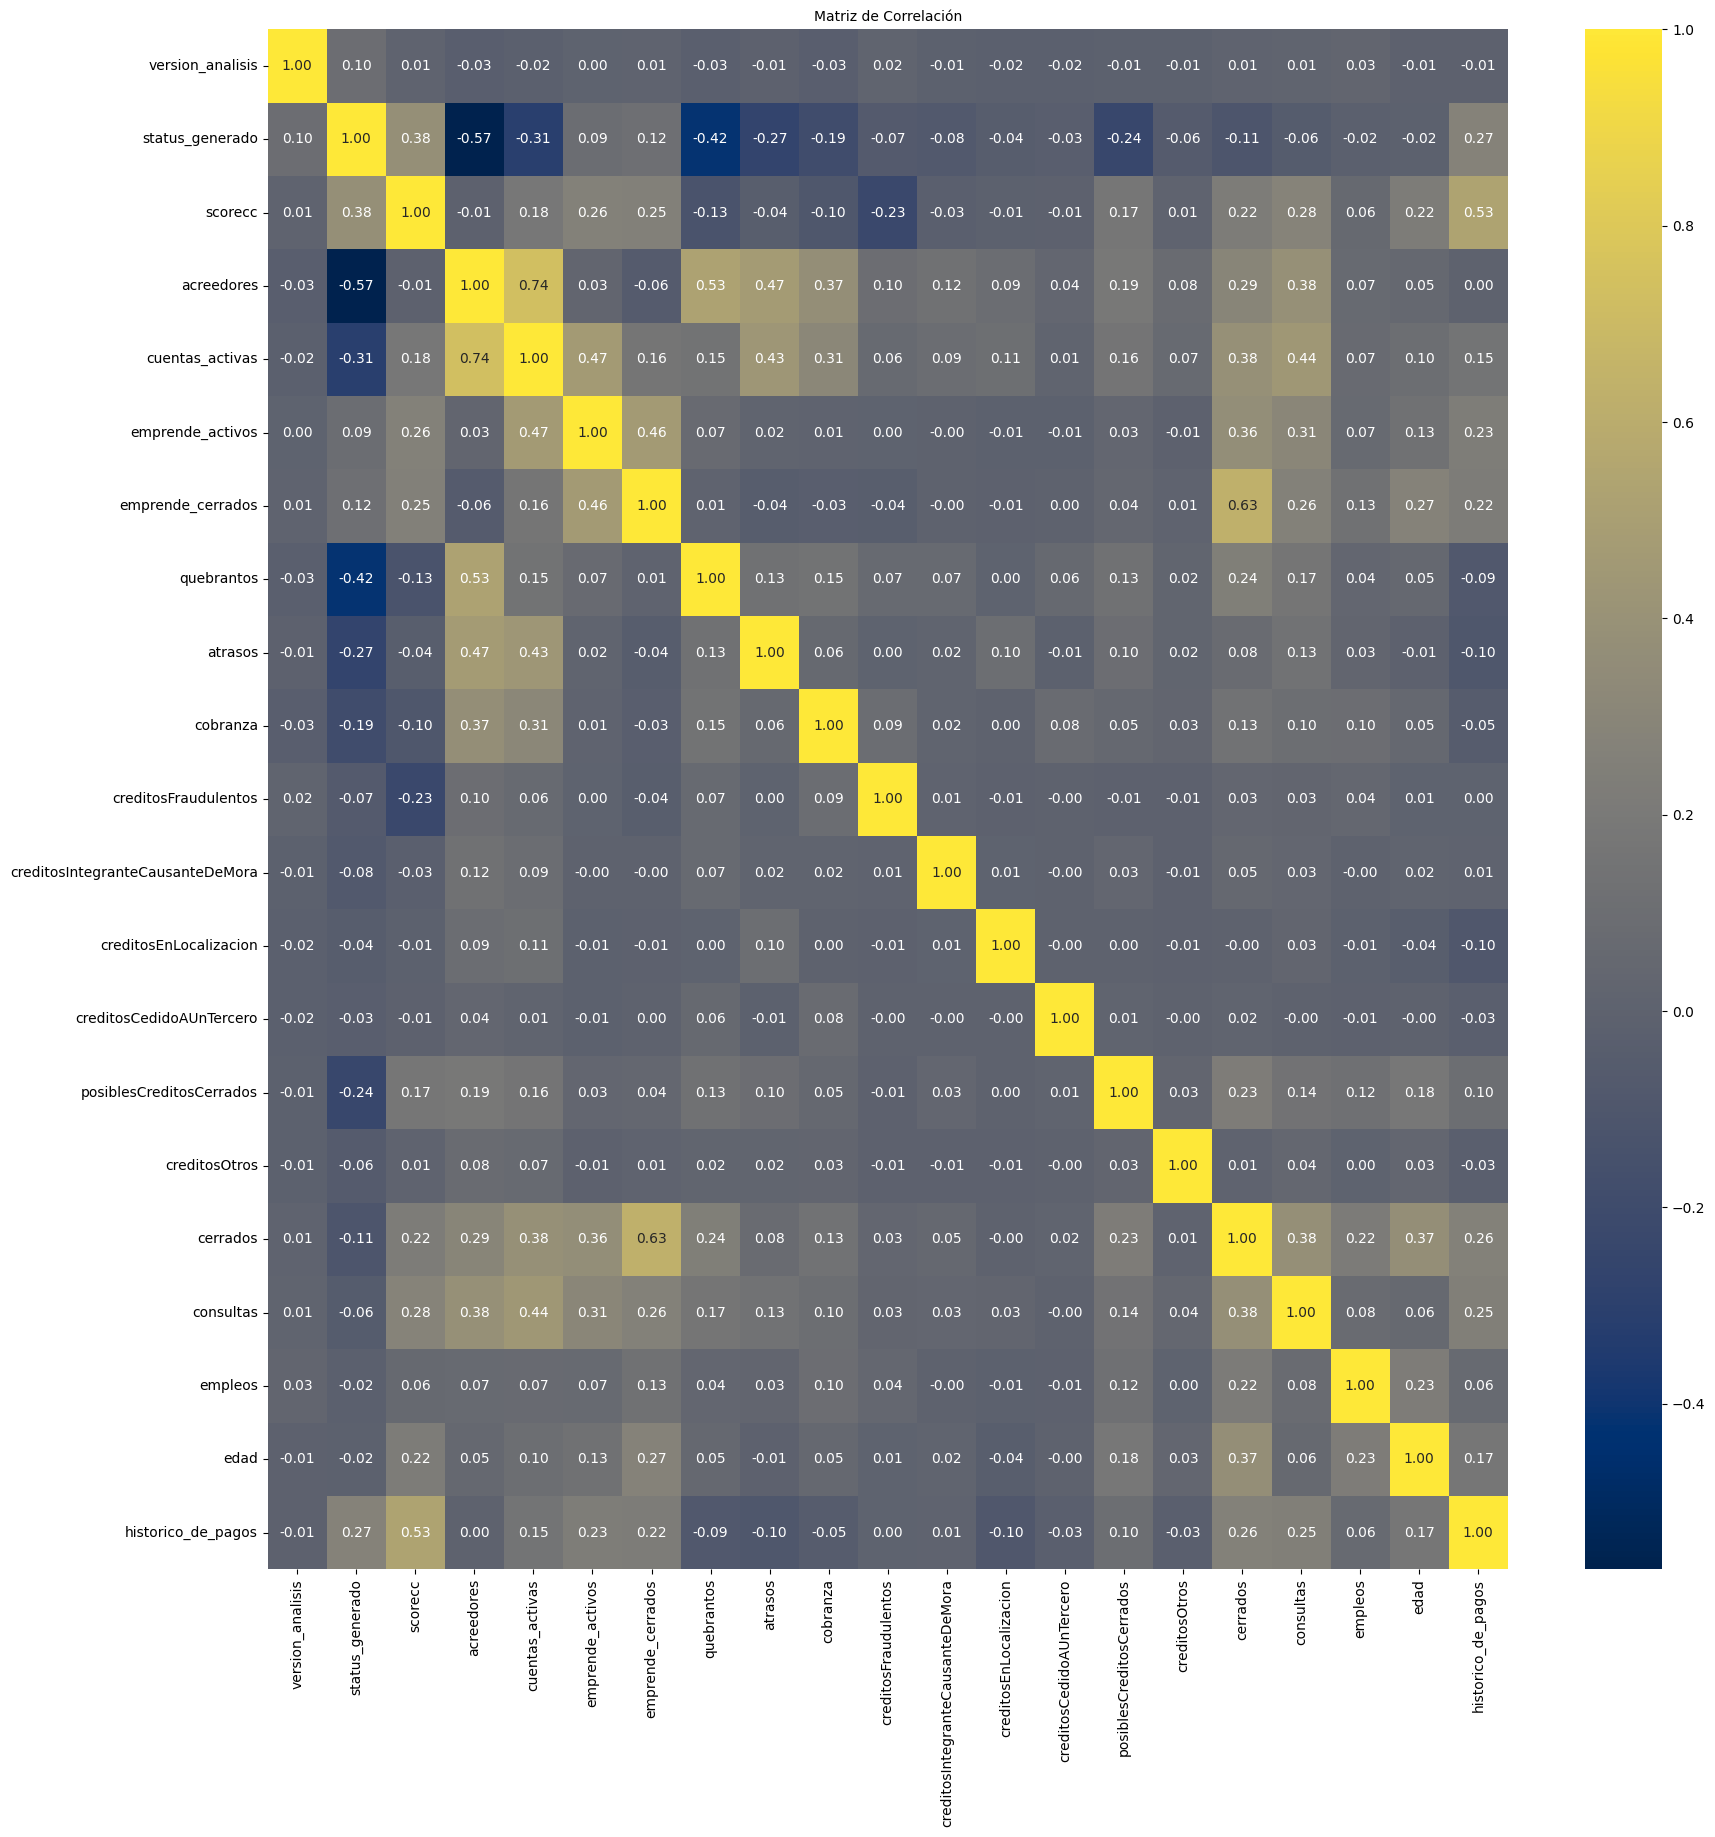

In [ ]:
# Realizamos la matriz de correlación
f, ax = plt.subplots(figsize=[20, 20])
sns.heatmap(DF.corr(), annot=True, fmt=".2f", ax=ax, cmap="cividis")
ax.set_title("Matriz de Correlación", fontsize=10)
plt.show()

# **Regresión Logísica**

In [ ]:
from sklearn.linear_model import LogisticRegression  #comando para crear modelo de regresión logística
from sklearn.model_selection import train_test_split   #comando para dividir datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler   #comando para estandarizar los datos
from sklearn.metrics import accuracy_score   #comando para calcular la precisión

#comando para acceder a más detalles de la regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
from scipy import stats


In [ ]:
X = DF.drop({'sucursal', 'nombre', 'fecha_de_consulta', 'status_generado'},axis =1)  #guardamos los datos del data frame que corresponden a las variables x
y = DF["status_generado"]   #Guardamos los datos de la variable que queremos predecir

In [ ]:
#Guardamos solamente la matriz o vector de valores según en cada caso
X = X.values
y = y.values

In [ ]:
#Dividimos los datos en entrenamiento y prueba con tamaño de 80% y 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
scaler = StandardScaler()   #inicializamos el estandarizador
X_train = scaler.fit_transform(X_train)  #estandarizamos los datos de entrenamiento
X_test = scaler.fit_transform(X_test)   #estandarizamos los datos de prueba

In [ ]:
X_train = sm.add_constant(X_train, prepend = True)  #añadimos una columna de 1's a los datos de entrenamiento que corresponde a la variable constante
modelo  = sm.Logit(endog = y_train, exog = X_train)  #creamos el modelo de regresión logística
modelo = modelo.fit()  #entrenamos del modelo
print(modelo.summary2())  #imprimimos el resumen del modelo

         Current function value: 0.274883
         Iterations: 35
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: y                Pseudo R-squared: 0.576    
Date:               2024-03-06 04:48 AIC:              3044.8169
No. Observations:   5462             BIC:              3183.5338
Df Model:           20               Log-Likelihood:   -1501.4  
Df Residuals:       5441             LL-Null:          -3543.3  
Converged:          0.0000           LLR p-value:      0.0000   
No. Iterations:     35.0000          Scale:            1.0000   
----------------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|    [0.025     0.975] 
----------------------------------------------------------------
const      1.6864   41.3733   0.0408 0.9675   -79.4037   82.7765
x1         0.4037    0.0461   8.7535 0.0000     0.3133    0.4941
x2         1.7508    0.0661  26.4827 0.0000     1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
X_test = sm.add_constant(X_test, prepend = True)  #añadimos una columna de 1's a los datos de prueba
y_pred = modelo.predict(X_test)  #hacemos las predicciones del modelo para los datos de prueba
y_pred = (y_pred >= 0.5).astype(int)  #convertimos los resultados a 0's y 1's

In [ ]:
#Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8857979502196194

In [ ]:
#guardamos cuáles son los parámetros que utilizamos en el modelo
cols = DF.drop({'sucursal', 'nombre', 'fecha_de_consulta', 'status_generado'},axis =1)
cols = cols.columns

In [ ]:
cols[12]  #vemos cuál es el parámetro 13 de la base de datos

'creditosCedidoAUnTercero'

# **Regresión Logística Ajustada**

In [ ]:
#eliminamos la columna 13 según el análisis del primer modelo
DF.drop('creditosCedidoAUnTercero',axis = 1, inplace = True)

In [ ]:
X = DF.drop({'sucursal', 'nombre', 'fecha_de_consulta', 'status_generado'},axis =1)  #guardamos los datos del data frame que corresponden a las variables x
y = DF["status_generado"]   #Guardamos los datos de la variable que queremos predecir

In [ ]:
#Guardamos solamente la matriz o vector de valores según en cada caso
X = X.values
y = y.values

In [ ]:
#Dividimos los datos en entrenamiento y prueba con tamaño de 80% y 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
scaler1 = StandardScaler()   #inicializamos el estandarizador
X_train = scaler1.fit_transform(X_train)  #estandarizamos los datos de entrenamiento
X_test = scaler1.fit_transform(X_test)   #estandarizamos los datos de prueba

In [ ]:
X_train = sm.add_constant(X_train, prepend = True)  #añadimos una columna de 1's a los datos de entrenamiento que corresponde a la variable constante
modelo  = sm.Logit(endog = y_train, exog = X_train)  #creamos el modelo de regresión logística
modelo = modelo.fit()  #entrenamos del modelo
print(modelo.summary2())  #imprimimos el resumen del modelo

Optimization terminated successfully.
         Current function value: 0.274949
         Iterations 8
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: y                Pseudo R-squared: 0.576    
Date:               2024-03-06 04:48 AIC:              3043.5381
No. Observations:   5462             BIC:              3175.6496
Df Model:           19               Log-Likelihood:   -1501.8  
Df Residuals:       5442             LL-Null:          -3543.3  
Converged:          1.0000           LLR p-value:      0.0000   
No. Iterations:     8.0000           Scale:            1.0000   
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
const    1.7016     0.0646    26.3483   0.0000    1.5750    1.8282
x1       0.4038     0.0461     8.7538   0.0000    0.3134    0.4942
x2 

In [ ]:
X_test = sm.add_constant(X_test, prepend = True)  #añadimos una columna de 1's a los datos de prueba
y_pred = modelo.predict(X_test)  #hacemos las predicciones del modelo para los datos de prueba
y_pred = (y_pred >= 0.5).astype(int)  #convertimos los resultados a 0's y 1's

In [ ]:
#Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8857979502196194

# **Matriz de Confusión y Curva de ROC**



In [ ]:
from sklearn.metrics import confusion_matrix  #comando para crear la matriz de confusión
from sklearn.metrics import roc_curve, auc   # comandos para crear la curva de roc y calcular el valor de auc
from sklearn.metrics import roc_auc_score  # comando para calcular el roc_auc score

In [ ]:
#creamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[377  75]
 [ 81 833]]


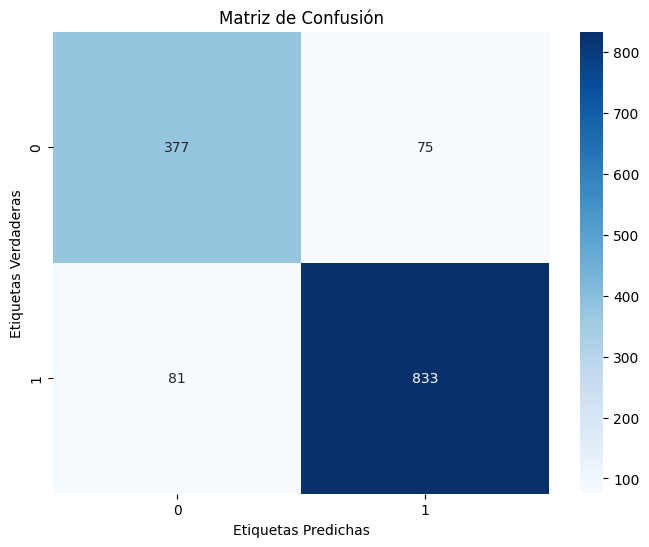

In [ ]:
# Plot de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# Creamos el modelo de regresion logistica
model = LogisticRegression()

# entrenamos el modelo
model.fit(X_train, y_train)

# obtenemos las predicciones de los datos de prueba
predictions = model.predict(X_test)

In [ ]:
#obtenemos las probabilidades de ser clase 1 para cada una de las predicciones
y_scores = model.predict_proba(X_test)[:, 1]

In [ ]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

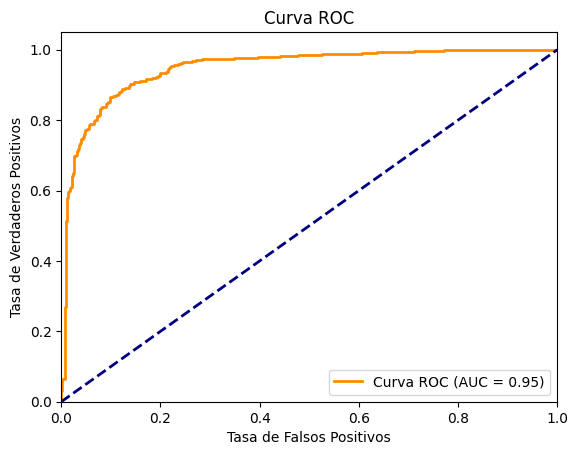

In [ ]:
# Plot de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# **Probabilidad de ser clase positiva dado un cliente**

In [ ]:
#obtenemos el nombre de los parámetros usados en el modelo
cols = DF.drop({'sucursal', 'nombre', 'fecha_de_consulta', 'status_generado'},axis =1)
cols = cols.columns

### Ejemplo de solicitud aceptada

In [ ]:
# Obtener el número de filas en la matriz
num_filas = X_test.shape[0]

# Generar un índice aleatorio dentro del rango de filas
indice_aleatorio = np.random.choice(num_filas)

# Seleccionar la fila aleatoria
cliente_aleatorio = X_test[indice_aleatorio:indice_aleatorio+1,][0]

In [ ]:
cliente_aleatorio1 = scaler1.inverse_transform(cliente_aleatorio[1:].reshape(1, -1))   #calculamos los valores originales, antes de haberlos estandarizado
cliente_aleatorio1.astype(int)  #volvemos enteros los valores

array([[  2, 710,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   2,   1,   1,  49,   1]])

In [ ]:
for i, col in enumerate(cols):   #se recorre el nombre y número de la columna
  print(col, ": ", cliente_aleatorio1[0][i].astype(int))   #se imprime el dato correspondiente según la columna

version_analisis :  2
scorecc :  710
acreedores :  0
cuentas_activas :  0
emprende_activos :  0
emprende_cerrados :  0
quebrantos :  0
atrasos :  0
cobranza :  0
creditosFraudulentos :  0
creditosIntegranteCausanteDeMora :  0
creditosEnLocalizacion :  0
posiblesCreditosCerrados :  1
creditosOtros :  0
cerrados :  2
consultas :  1
empleos :  1
edad :  49
historico_de_pagos :  1


In [ ]:
cliente_pred = modelo.predict(cliente_aleatorio)  #obtenemos la predicción que devuelve el modelo
cliente_pred = (cliente_pred >= 0.5).astype(int)
cliente_pred[0]

1

In [ ]:
#Obtenemos la probabilidad de ser clase 1 para los datos dados
proba_cliente = model.predict_proba(cliente_aleatorio.reshape(1, -1))[:, 1]
proba_cliente[0]

0.9927326882031965

### Ejemplo de solicitud rechazada

In [ ]:
# Generar un índice aleatorio dentro del rango de filas
indice_aleatorio_ = np.random.choice(num_filas)

In [ ]:
# Seleccionar la fila aleatoria
cliente_aleatorio_ = X_test[indice_aleatorio_:indice_aleatorio_+1,][0]

In [ ]:
cliente_aleatorio2 = scaler1.inverse_transform(cliente_aleatorio_[1:].reshape(1, -1))   #calculamos los valores originales, antes de haberlos estandarizado
cliente_aleatorio2.astype(int)   #volvemos enteros los valores

array([[  2, 503,   3,   3,   1,  28,   1,   0,   1,   0,   0,   0,   0,
          0,  49,  15,   0,  30,   1]])

In [ ]:
for i, col in enumerate(cols):   #se recorre el nombre y número de la columna
  print(col, ": ", cliente_aleatorio2[0][i].astype(int))    #se imprime el dato correspondiente según la columna

version_analisis :  2
scorecc :  503
acreedores :  3
cuentas_activas :  3
emprende_activos :  1
emprende_cerrados :  28
quebrantos :  1
atrasos :  0
cobranza :  1
creditosFraudulentos :  0
creditosIntegranteCausanteDeMora :  0
creditosEnLocalizacion :  0
posiblesCreditosCerrados :  0
creditosOtros :  0
cerrados :  49
consultas :  15
empleos :  0
edad :  30
historico_de_pagos :  1


In [ ]:
cliente_pred_ = modelo.predict(cliente_aleatorio_)   #obtenemos la predicción que devuelve el modelo
cliente_pred_ = (cliente_pred_ >= 0.5).astype(int)
cliente_pred_[0]

0

In [ ]:
#Obtenemos la probabilidad de ser clase 1 para los datos dados
proba_cliente_ = model.predict_proba(cliente_aleatorio_.reshape(1, -1))[:, 1]
proba_cliente_[0]

0.14158895740113434